In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import cluster
from collections import Counter

# Read csv file into a pandas dataframe
data = pd.read_csv('ardd_fatalities_jan2022.csv',header=None)

# Print the first five rows of data
data.head()

C:\Users\schif\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,3,10,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
1,20225010,WA,1,2022,Sunday,2:50,Single,No,No,No,...,20,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekend,Night
2,20224003,SA,1,2022,Friday,21:10,Single,No,No,No,...,21,Remote Australia,South Australia - Outback,Lower Eyre Peninsula (DC),Local Road,No,No,17_to_25,Weekend,Night
3,20223017,Qld,1,2022,Sunday,18:00,Single,No,No,No,...,26,Inner Regional Australia,Ipswich,Somerset (R),Sub-arterial Road,No,No,26_to_39,Weekend,Night
4,20223013,Qld,1,2022,Friday,18:00,Single,No,No,No,...,22,Inner Regional Australia,Wide Bay,Fraser Coast (R),Local Road,No,No,17_to_25,Weekend,Night


In [2]:
data2 = data.copy()

In [3]:

data2.columns = ['Crash_ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash_Type', 'Bus_Involvement', 'Heavy_Rigid_Truck_Involvement', 
'Articulated_Truck_Involvement', 'Speed_limit', 'Road_User', 'Gender', 'Age', 'National_Remoteness_Areas', 'SA4_Name_2016', 
                 'National_LGA_Name_2017', 'National_Road_Type', 'Christmas_Period', 'Easter_Period', 'Age_Group', 'Day_Of_Week', 'Time_of_Day']
data2.drop(index=data2.index[0], axis=0, inplace=True) # remove first row of data

In [4]:
print('Number of missing values:')
for col in data2.columns:
    print('\t%s: %d' % (col,data2[col].isna().sum()))

Number of missing values:
	Crash_ID: 0
	State: 0
	Month: 0
	Year: 0
	Dayweek: 0
	Time: 0
	Crash_Type: 0
	Bus_Involvement: 0
	Heavy_Rigid_Truck_Involvement: 0
	Articulated_Truck_Involvement: 0
	Speed_limit: 0
	Road_User: 0
	Gender: 0
	Age: 0
	National_Remoteness_Areas: 45872
	SA4_Name_2016: 45858
	National_LGA_Name_2017: 45854
	National_Road_Type: 45873
	Christmas_Period: 0
	Easter_Period: 0
	Age_Group: 0
	Day_Of_Week: 0
	Time_of_Day: 0


In [5]:
# Seperate capegorical and numeric
data2['Crash_ID'] = pd.to_numeric(data2['Crash_ID'], errors='coerce')
data2['Month'] = pd.to_numeric(data2['Month'], errors='coerce')
data2['Year'] = pd.to_numeric(data2['Year'], errors='coerce')
data2['Speed_limit'] = pd.to_numeric(data2['Speed_limit'], errors='coerce')
data2['Age'] = pd.to_numeric(data2['Age'], errors='coerce')

In [6]:
numeric_attributes = data2.columns[data2.dtypes != "object"]
categorical_attributes = data2.columns[data2.dtypes == "object"]

print(numeric_attributes)
print(categorical_attributes)

Index(['Crash_ID', 'Month', 'Year', 'Speed_limit', 'Age'], dtype='object')
Index(['State', 'Dayweek', 'Time', 'Crash_Type', 'Bus_Involvement',
       'Heavy_Rigid_Truck_Involvement', 'Articulated_Truck_Involvement',
       'Road_User', 'Gender', 'National_Remoteness_Areas', 'SA4_Name_2016',
       'National_LGA_Name_2017', 'National_Road_Type', 'Christmas_Period',
       'Easter_Period', 'Age_Group', 'Day_Of_Week', 'Time_of_Day'],
      dtype='object')


In [7]:
data2 = data2.replace(-9, np.NaN)
modified_data = data2.dropna()

# Print the total number of missing values
print("There are {} missing values in this dataset".format(modified_data.isnull().sum().sum()))

print('Number of instances = %d' % (modified_data.shape[0]))
print('Number of attributes = %d' % (modified_data.shape[1]))

print('Number of missing values:')
for col in modified_data.columns:
    print('\t%s: %d' % (col,modified_data[col].isna().sum()))

There are 0 missing values in this dataset
Number of instances = 7254
Number of attributes = 23
Number of missing values:
	Crash_ID: 0
	State: 0
	Month: 0
	Year: 0
	Dayweek: 0
	Time: 0
	Crash_Type: 0
	Bus_Involvement: 0
	Heavy_Rigid_Truck_Involvement: 0
	Articulated_Truck_Involvement: 0
	Speed_limit: 0
	Road_User: 0
	Gender: 0
	Age: 0
	National_Remoteness_Areas: 0
	SA4_Name_2016: 0
	National_LGA_Name_2017: 0
	National_Road_Type: 0
	Christmas_Period: 0
	Easter_Period: 0
	Age_Group: 0
	Day_Of_Week: 0
	Time_of_Day: 0


In [8]:
data3 = data2.copy()

In [9]:
data3 = data3.replace("Very Remote Australia", "1")
data3 = data3.replace("Remote Australia", "2")
data3 = data3.replace("Outer Regional Australia", "3")
data3 = data3.replace("Inner Regional Australia", "4")
data3 = data3.replace("Major Cities of Australia", "5")


data3 = data3.replace("?", np.NaN)

,Crash_ID,State,Month,Year,Dayweek,Time,Crash_Type,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,...,Age,National_Remoteness_Areas,SA4_Name_2016,National_LGA_Name_2017,National_Road_Type,Christmas_Period,Easter_Period,Age_Group,Day_Of_Week,Time_of_Day
2,20224003,SA,1,2022,Friday,21:10,Single,No,No,No,...,21.0,2,South Australia - Outback,Lower Eyre Peninsula (DC),Local Road,No,No,17_to_25,Weekend,Night
3,20223017,Qld,1,2022,Sunday,18:00,Single,No,No,No,...,26.0,4,Ipswich,Somerset (R),Sub-arterial Road,No,No,26_to_39,Weekend,Night
4,20223013,Qld,1,2022,Friday,18:00,Single,No,No,No,...,22.0,4,Wide Bay,Fraser Coast (R),Local Road,No,No,17_to_25,Weekend,Night
5,20223005,Qld,1,2022,Friday,23:00,Single,No,No,No,...,44.0,5,Brisbane - South,Brisbane (C),Local Road,No,No,40_to_64,Weekend,Night
6,20223010,Qld,1,2022,Saturday,22:00,Single,No,No,No,...,29.0,3,Townsville,Townsville (C),Collector Road,No,No,26_to_39,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,20144083,SA,1,2014,Friday,11:10,Multiple,No,Yes,No,...,40.0,3,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Weekday,Day
9487,20145108,WA,1,2014,Wednesday,11:47,Single,No,No,No,...,46.0,5,Perth - South East,Belmont (C),NATIONAL OR STATE HIGHWAY,Yes,No,40_to_64,Weekday,Day
9496,20144022,SA,1,2014,Monday,9:35,Single,No,No,No,...,82.0,5,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Weekday,Day
9504,20145072,WA,1,2014,Tuesday,21:30,Single,No,No,No,...,84.0,2,Western Australia - Outback (South),Esperance (S),NATIONAL OR STATE HIGHWAY,No,No,75_or_older,Weekday,Night


In [10]:
data4 = data3[['National_Remoteness_Areas', 'Age']]

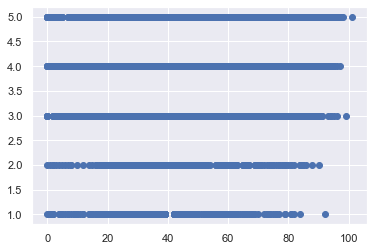

In [11]:
plt.scatter(data4['Age'],data4['National_Remoteness_Areas'])
plt.show()

In [18]:
data5 = data4.dropna()
data5

,National_Remoteness_Areas,Age
2,2,21.0
3,4,26.0
4,4,22.0
5,5,44.0
6,3,29.0
...,...,...
9481,3,40.0
9487,5,46.0
9496,5,82.0
9504,2,84.0


Text(0, 0.5, 'SSE')

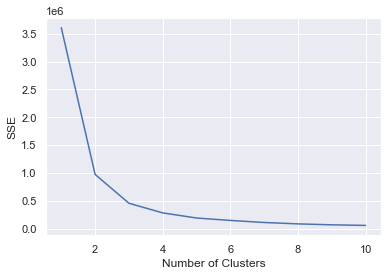

In [19]:
numClusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data5)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

For n_clusters = 2 The average silhouette_score is : 0.6171131166078397
For n_clusters = 3 The average silhouette_score is : 0.5831674029732633
For n_clusters = 4 The average silhouette_score is : 0.5462450614584891
For n_clusters = 5 The average silhouette_score is : 0.5213734815051219
For n_clusters = 6 The average silhouette_score is : 0.501947972210461


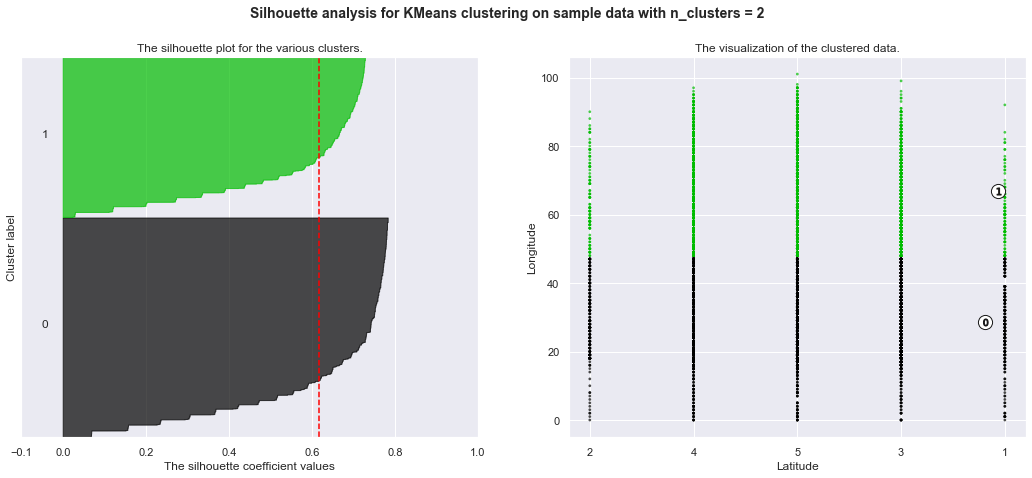

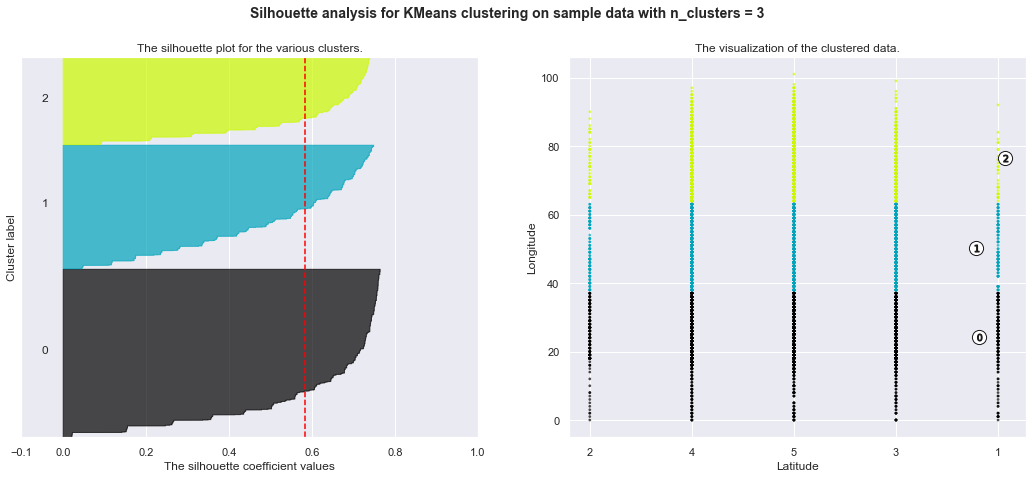

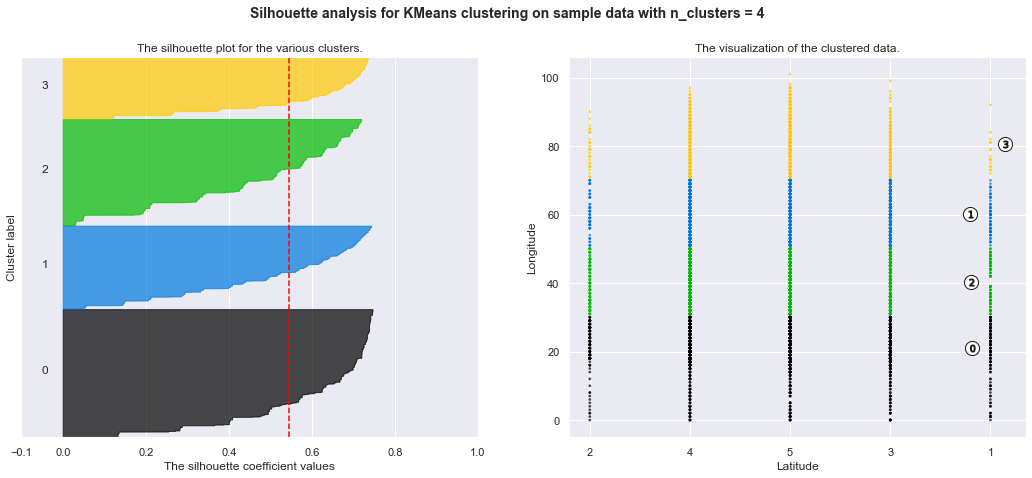

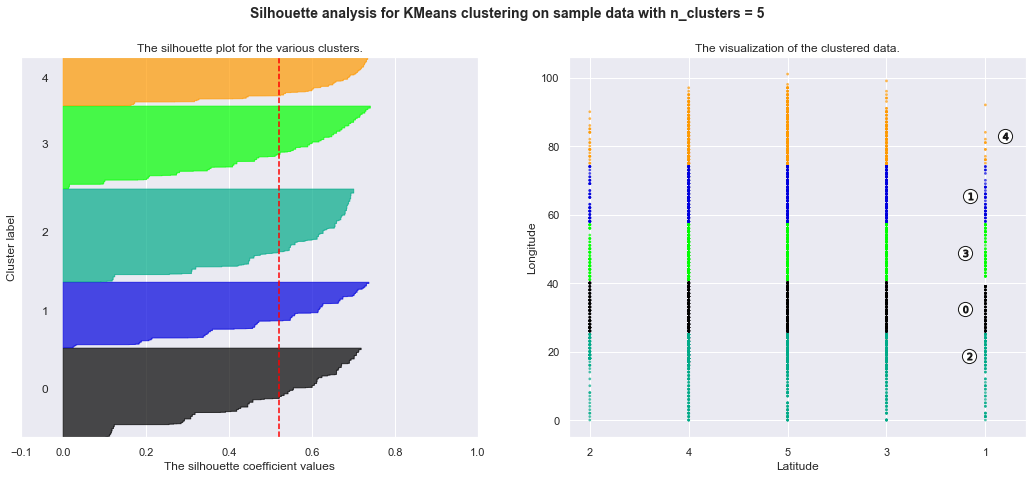

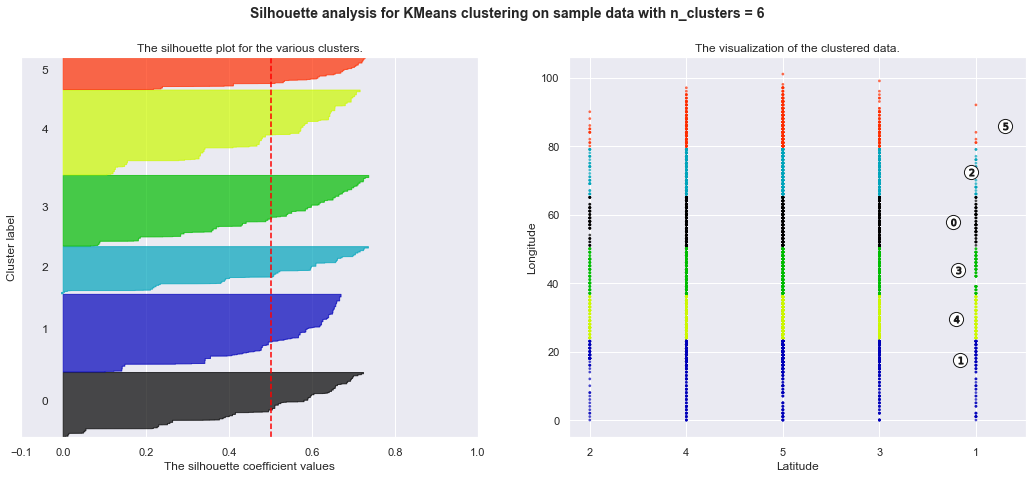

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = data5

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Latitude")
    ax2.set_ylabel("Longitude")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [21]:
# Frequency of collisions for regional areas using Crash ID and National Remoteness Areas

data6 = data3[['National_Remoteness_Areas', 'Crash_ID']]


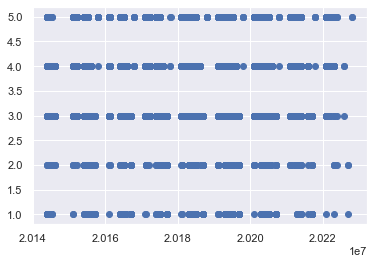

In [22]:
plt.scatter(data6['Crash_ID'],data6['National_Remoteness_Areas'])
plt.show()

In [23]:
data7 = data6.dropna()
data7

,National_Remoteness_Areas,Crash_ID
2,2,20224003
3,4,20223017
4,4,20223013
5,5,20223005
6,3,20223010
...,...,...
9481,3,20144083
9487,5,20145108
9496,5,20144022
9504,2,20145072


Text(0, 0.5, 'SSE')

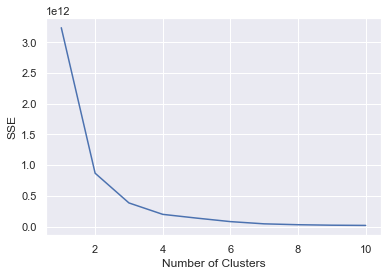

In [24]:
numClusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data7)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

For n_clusters = 2 The average silhouette_score is : 0.6253636660871416
For n_clusters = 3 The average silhouette_score is : 0.6028648612831301
For n_clusters = 4 The average silhouette_score is : 0.6310876110814639
For n_clusters = 5 The average silhouette_score is : 0.5992539974036766
For n_clusters = 6 The average silhouette_score is : 0.6871729388885414


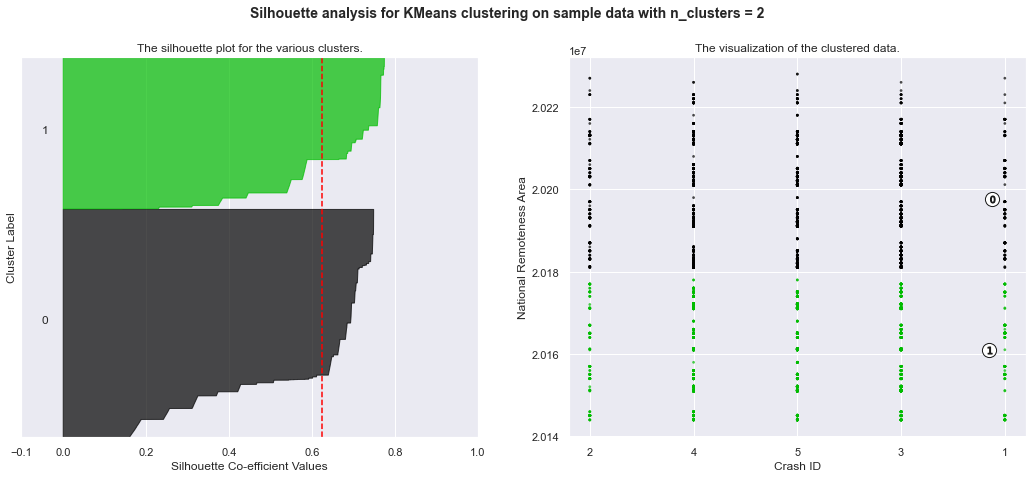

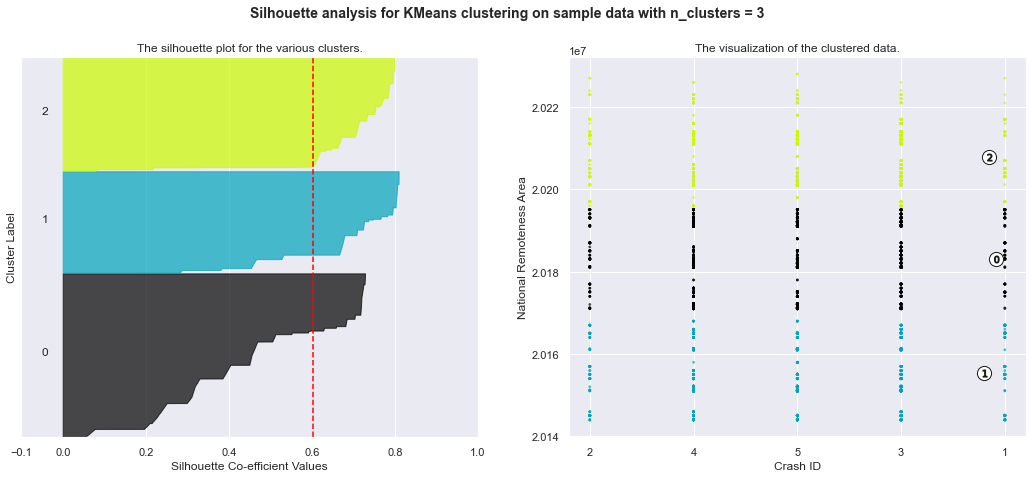

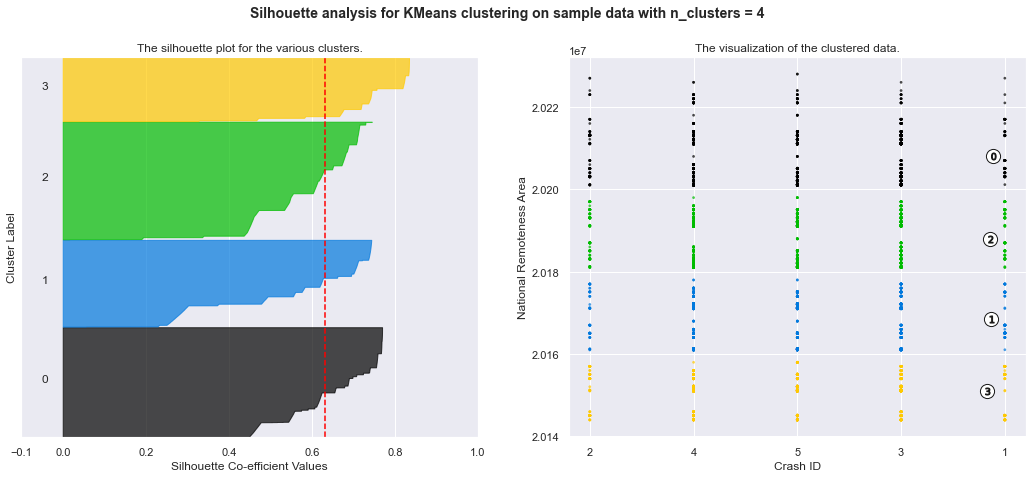

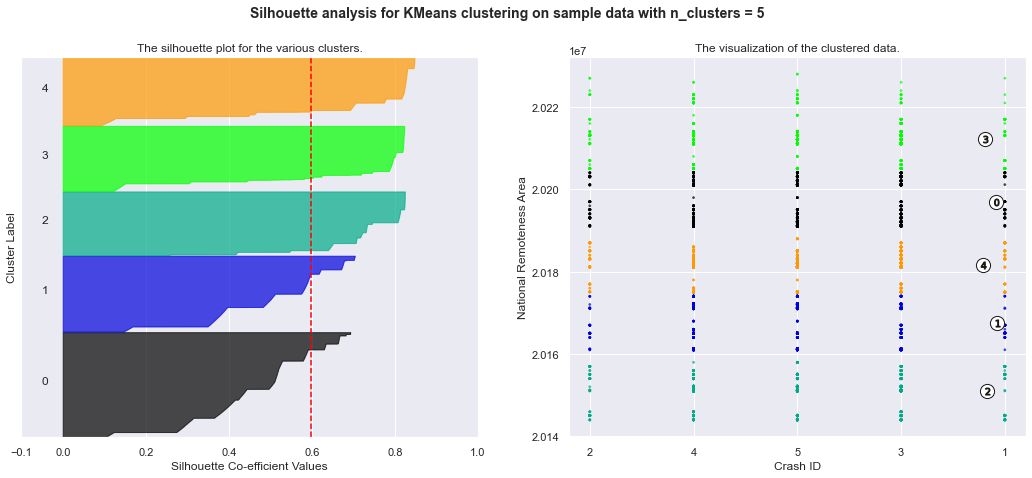

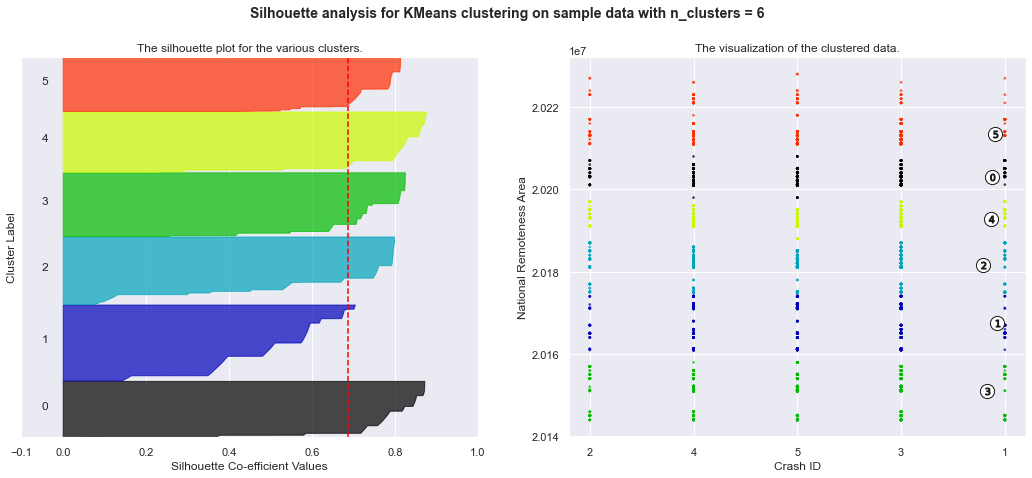

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = data7

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette Co-efficient Values")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Crash ID")
    ax2.set_ylabel("National Remoteness Area")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()